In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:/3-Semester/BABI/Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df_clean=df.loc[:,~df.columns.str.contains('Unnamed')]
df_clean.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df_clean.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [72]:
labels=df_clean['sales']
features=df_clean.drop(['sales'],axis=1)
print(labels)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
5       7.2
6      11.8
7      13.2
8       4.8
9      10.6
10      8.6
11     17.4
12      9.2
13      9.7
14     19.0
15     22.4
16     12.5
17     24.4
18     11.3
19     14.6
20     18.0
21     12.5
22      5.6
23     15.5
24      9.7
25     12.0
26     15.0
27     15.9
28     18.9
29     10.5
       ... 
170     8.4
171    14.5
172     7.6
173    11.7
174    11.5
175    27.0
176    20.2
177    11.7
178    11.8
179    12.6
180    10.5
181    12.2
182     8.7
183    26.2
184    17.6
185    22.6
186    10.3
187    17.3
188    15.9
189     6.7
190    10.8
191     9.9
192     5.9
193    19.6
194    17.3
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


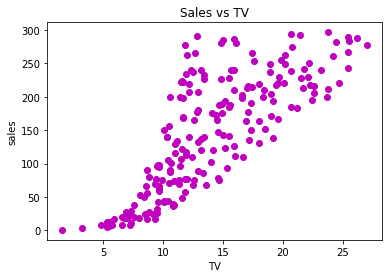

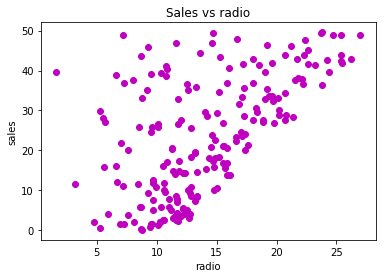

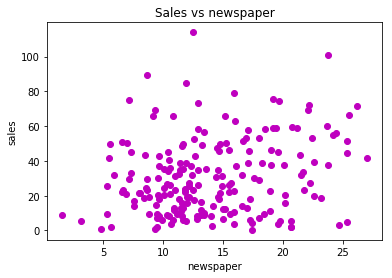

In [16]:
for x in features:
    plt.plot(labels,features[x],'mo')
    plt.title("Sales vs " + x)
    plt.xlabel(x)
    plt.ylabel("sales")
    plt.show()

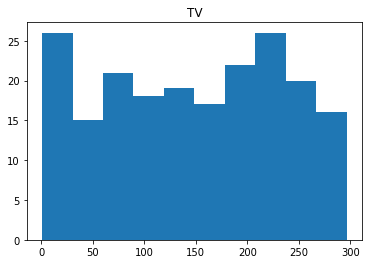

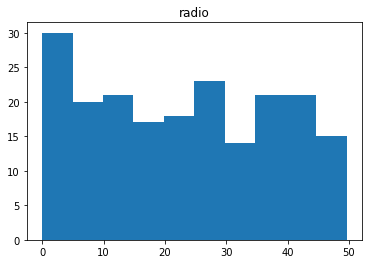

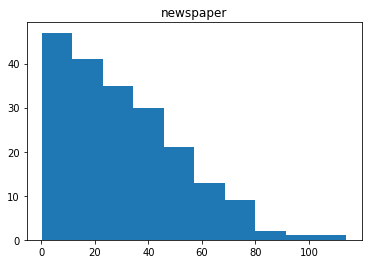

In [17]:
for x in features:
    plt.hist(features[x])
    plt.title(x)
    plt.show()  

ValueError: Data must be positive.

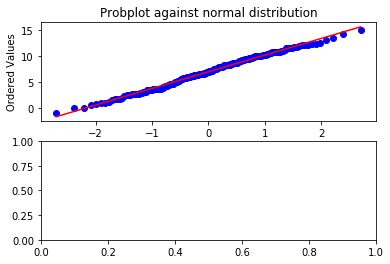

In [73]:
#As from the above histogram graph, the data distribution for the newspaper is skrew towards left.
#Lets correct it using Box Cox which helps in removing the data skrewness.

from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = df_clean['newspaper']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
#We now use boxcox to transform the data so it’s closest to normal:
ax2 = fig.add_subplot(212)
df_clean['newspaper'], _ = stats.boxcox(x)
prob = stats.probplot(df_clean['newspaper'], dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

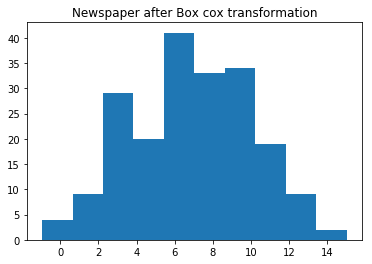

In [68]:
plt.hist(df_clean['newspaper'], bins='auto')  # arguments are passed to np.histogram
plt.title("Newspaper after Box cox transformation")
plt.show()

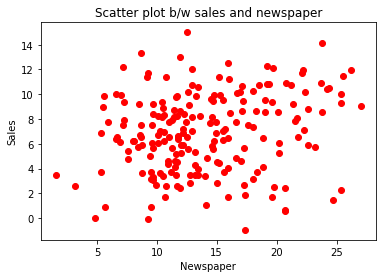

In [64]:
plt.plot(df_clean['sales'], df_clean['newspaper'], 'ro')  # arguments are passed to np.histogram
plt.title("Scatter plot b/w sales and newspaper")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

In [69]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="sales~TV+radio+newspaper", data=df_clean).fit()
model2 = sm.ols(formula="sales~TV+radio", data=df_clean).fit()
model3 = sm.ols(formula="sales~TV", data=df_clean).fit()
#sales~TV+radio+newspaper
print(model1.summary())
print(model2.summary())
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.2
Date:                Thu, 05 Sep 2019   Prob (F-statistic):           1.58e-96
Time:                        00:38:18   Log-Likelihood:                -386.19
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8894      0.361      7.995      0.0

In [70]:
#Actual and predicted values
y_pred = model2.predict()
df1 = pd.DataFrame({'Actual': labels, 'Predicted': y_pred})  
df1.head(10)

,Actual,Predicted
0,22.1,20.555465
1,10.4,12.345362
2,9.3,12.337018
3,18.5,17.617116
4,12.9,13.223908
5,7.2,12.512084
6,11.8,11.718212
7,13.2,12.105516
8,4.8,3.709379
9,10.6,12.551697


In [71]:
#Model 2 Parameters, error, and r square
print('Parameters: ', model2.params)
print('R2: ', model2.rsquared)
print('Standard errors: ', model2.bse)

Parameters:  Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64
R2:  0.8971942610828956
Standard errors:  Intercept    0.29449
TV           0.00139
radio        0.00804
dtype: float64
